  penjelasannya : jadi terdapat robot mobil yang akan secara otomatis memusnahkan tanaman liar dengan cara berjalan di perkebunan dengan satu jejer kebun berada ditengah rodanya yang selebar >1 meter. setiap 2x1 meter mobil ini akan mendeteksi keberadaan tanaman liar dengan computer vision dan nantinya akan di bakar laser secara otomatis.

In [1]:
import requests
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# DATA TRAINING

menggunakan dataset bunga iris yang sudah ada datasetnya. berisi fitur fitur dari bunga iris

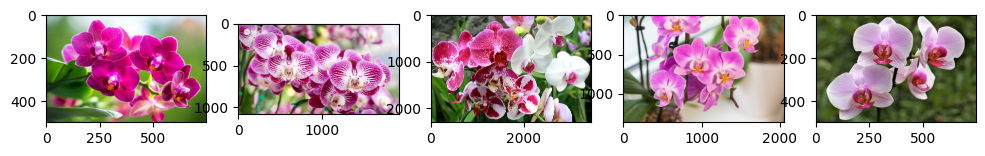

(5, 480, 480, 3)


In [2]:
Dataset_Bunga_Anggrek = []
Dataset_Bunga_Anggrek.append("https://asset.kompas.com/crops/NIEU-bg9SpAGiJHT7hyPFd5nV4M=/32x0:1000x645/750x500/data/photo/2020/11/23/5fbb4d388d220.jpg")
Dataset_Bunga_Anggrek.append("https://store.sirclo.com/blog/wp-content/uploads/2022/06/Banner-Blog-09-8.jpg")
Dataset_Bunga_Anggrek.append("https://assets.pikiran-rakyat.com/crop/0x0:0x0/x/photo/2020/10/12/972629178.jpg")
Dataset_Bunga_Anggrek.append("https://cdn.popmama.com/content-images/community/20230529/community-712bb77b064331d09cea30ab455c4f37.jpg")
Dataset_Bunga_Anggrek.append("https://asset.kompas.com/crops/hMHNN2f2gqN0fjHbf3eN4D9aGTs=/0x0:1920x1280/750x500/data/photo/2022/02/02/61fa8689dc71f.jpg")

def download_gambar(url, nama_file):
    r = requests.get(url, stream=True)
    if r.status_code == 200:
        img = Image.open(r.raw)
        img.save(nama_file)

folder_gambar = "dataset"
if not os.path.exists(folder_gambar):
    os.makedirs(folder_gambar)

# Ubah nama bunga dalam list menjadi "image1", "image2", dan seterusnya
for i, url in enumerate(Dataset_Bunga_Anggrek):
    nama_gambar_baru = os.path.join(folder_gambar, f"image{i + 1}.jpg")
    download_gambar(url, nama_gambar_baru)

imgs=[]
plt.figure(figsize=(12,2))
for u in range(0,len(Dataset_Bunga_Anggrek)):
  r = requests.get(Dataset_Bunga_Anggrek[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(Dataset_Bunga_Anggrek),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

In [3]:
Dataset_validation = []
Dataset_validation.append("https://media.suara.com/pictures/653x366/2019/12/02/35927-anggrek-tanaman-pembawa-hoki-ini-dalam-rumah.jpg")
Dataset_validation.append("https://sarungpreneur.com/wp-content/uploads/2015/09/bunga-anggrek.jpg")

gambar_coba = "datasetcoba"
if not os.path.exists(gambar_coba):
    os.makedirs(gambar_coba)

# Ubah nama bunga dalam list menjadi "image1", "image2", dan seterusnya
for i, url in enumerate(Dataset_validation):
    coba = os.path.join(gambar_coba, f"img{i + 1}.jpg")
    download_gambar(url, coba)

Model Computer Vision untuk deteksi Gambar

Rancangan untuk sistem kendali robotic pada mobil

In [4]:
class mobilRobotic():
    def __init__(self, model):
        # memproses model untuk klasifikasi model
        self.model = processingmodel(model)
        # proses menginisialisasi perangkat keras robot/mobil

    def proses_gambar(self, image):
        # Memfoto gambar (foto perkebunan 2x1 meter)
        # memproses seperti mengubah bentuk gambar sesuai yang dibutuhkan model lalu di proses
        image = cv2.resize(image, (224, 224)) #misal diubah menjadi 224x224 pixel
        image = image.astype('float32') / 255.0
        image = np.expand_dims(image, axis=0)
        return image

    def deteksi_gambar(self, image):
        # hasil proses gambar kemudian di deteksi untuk mendeteksi tanaman liar dari tanaman iris
        hasil = self.prosesgambar(image)
        deteksi_bunga = self.model.predict(hasil)
        return deteksi_bunga
        #setelah terdeteksi mana tanaman iris mana tanaman liar

    def pemusnahan_tanaman_liar(self, detesi_bunga):
        # tanaman liar yang terdeteksi kemudia dimusnahkan menggunakan laser
        # setelah selesai mobil akan maju untuk bagian selanjutnya
        pass


    def jalan_mobil(self):
        # membuat robot berjalan dengan rentang setiap 2 meter (karena deteksi 2x1 meter)
        # selain itu juga mobilitas yang lain seperti belok jika ingin otomatis
        pass



